In [28]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

from utils.save_results import *
from utils.read_results import *
from utils.model_setup import *
from utils.dataset_setup import *
from utils.experiment_setup import *
from utils.metric_setup import *

In [29]:
path_to = "./data/Datasets/"

In [30]:
"""
Setup Dataset
"""
dataset_names = ["propor2024", "fullGradeEnemEssays2024"]

In [31]:
dataset_types = ["train", "test", "validation"]

In [32]:
general_df = []
for dataset_type in dataset_types:
    for dataset_name in dataset_names:
        dataset_filepath = path_to + dataset_name + "/" + dataset_type + ".csv"
        df = pd.read_csv(dataset_filepath)
        df['grades'] = df['grades'].apply(lambda label: list(map(int, label.strip("[]").replace(",", " ").split()[:5])))
        grades_expanded = pd.DataFrame(df['grades'].tolist(), columns=['Competência 1', 'Competência 2', 'Competência 3', 'Competência 4', 'Competência 5'], index=df.index)
        df = pd.concat([df, grades_expanded], axis=1)
        general_df.append(df)
        print(f"{dataset_type}: {df.shape[0]}")

df = pd.concat(general_df, axis=0)
print(f"Total: {df.shape[0]}")

train: 744
train: 129
test: 216
test: 27
validation: 195
validation: 23
Total: 1334


In [11]:
df

,id,id_prompt,essay_title,essay_text,grades,essay_year,supporting_text,Competência 1,Competência 2,Competência 3,Competência 4,Competência 5
0,5.html,violencia-e-drogas-o-papel-do-usuario,Ultimamente temos observado um aumento,"Ultimamente, temos observado, um aumento consi...","[0, 0, 0, 0, 0]",2018,Quem matou ele?\nMadrugada no morro. Um grupo ...,0,0,0,0,0
1,12.html,violencia-e-drogas-o-papel-do-usuario,A violência por um ponto de vista otimista,"Infelizmente, no Brasil, na maioria dos lugare...","[0, 0, 0, 0, 0]",2018,Quem matou ele?\nMadrugada no morro. Um grupo ...,0,0,0,0,0
2,19.html,violencia-e-drogas-o-papel-do-usuario,Violência gera violência,"Em todos os lugares do Brasil temos violência,...","[0, 0, 0, 0, 0]",2018,Quem matou ele?\nMadrugada no morro. Um grupo ...,0,0,0,0,0
3,5.html,por-que-os-jovens-querem-deixar-o-brasil,O país do futuro,"No Brasil, o número de cidadãos que querem mig...","[0, 0, 0, 0, 0]",2018,62% dos jovens brasileiros querem emigrar\nNum...,0,0,0,0,0
4,19.html,por-que-os-jovens-querem-deixar-o-brasil,A canção do sabiá,"Com apenas 20 anos de idade, o poeta romântico...","[200, 200, 200, 200, 200]",2018,62% dos jovens brasileiros querem emigrar\nNum...,200,200,200,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...
190,10.html,carnaval-e-apropriacao-cultural,Dar voz para quem não a possui,A apropriação cultural acontece quando um indi...,"[160, 120, 120, 160, 40]",2020,"Índio não é fantasia\nPenas, pinturas corporai...",160,120,120,160,40
191,19.html,carnaval-e-apropriacao-cultural,Apropriação Cultural e o Racismo Velado,"No que se refere, a apropriação cultural é um ...","[120, 120, 120, 120, 120]",2020,"Índio não é fantasia\nPenas, pinturas corporai...",120,120,120,120,120
192,6.html,como-melhorar-a-educacao-sem-valorizar-o-profe...,Vivemos em um país onde a educação,Vivemos em um país onde a educação e pouca val...,"[80, 80, 80, 80, 40]",2017,Relação comprometida\nDe acordo com muitos edu...,80,80,80,80,40
193,15.html,como-melhorar-a-educacao-sem-valorizar-o-profe...,A educação é um bebe,Conhecimento sobre a realidade do brasileiro é...,"[80, 120, 80, 120, 80]",2017,Relação comprometida\nDe acordo com muitos edu...,80,120,80,120,80


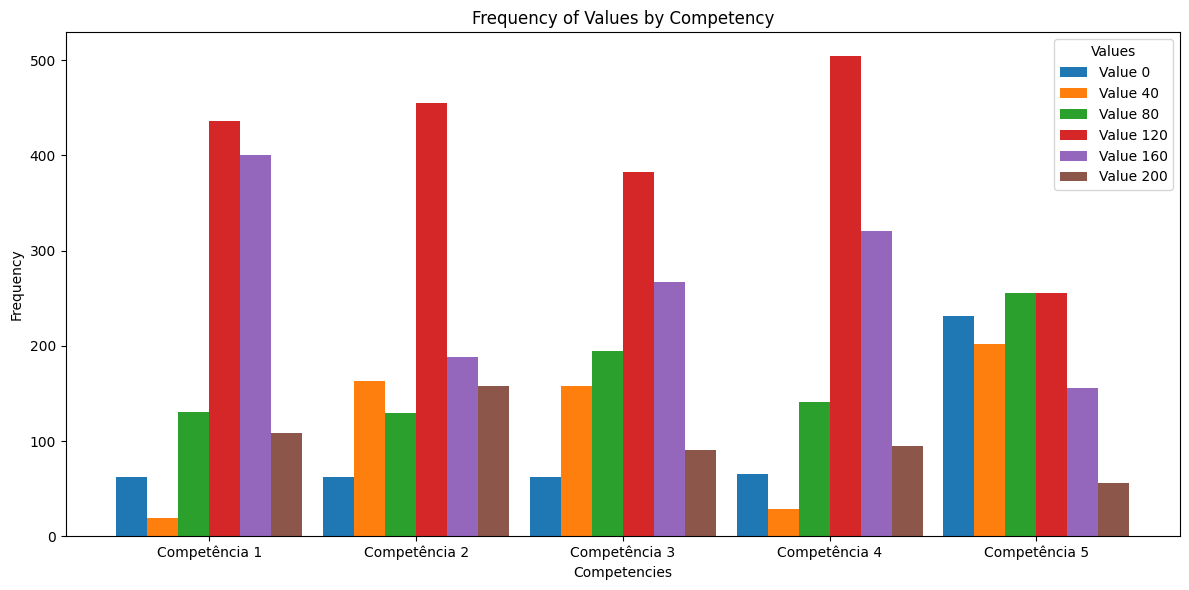

In [12]:
# Possible values for the competencies
competence_values = [0, 40, 80, 120, 160, 200]
columns = ['Competência 1', 'Competência 2', 'Competência 3', 'Competência 4', 'Competência 5']

# Count occurrences of each value for every competence column
counts = {col: df[col].value_counts().reindex(competence_values, fill_value=0) for col in columns}

# Convert counts to a DataFrame for easier plotting
counts_df = pd.DataFrame(counts)

# Plotting
competencies = counts_df.columns
x = np.arange(len(competencies))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each value
for i, value in enumerate(competence_values):
    ax.bar(x + i * width, counts_df.loc[value], width, label=f'Value {value}')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Competencies')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Values by Competency')
ax.set_xticks(x + (len(competence_values) - 1) * width / 2)
ax.set_xticklabels(competencies)
ax.legend(title='Values')

fig.tight_layout()
plt.show()

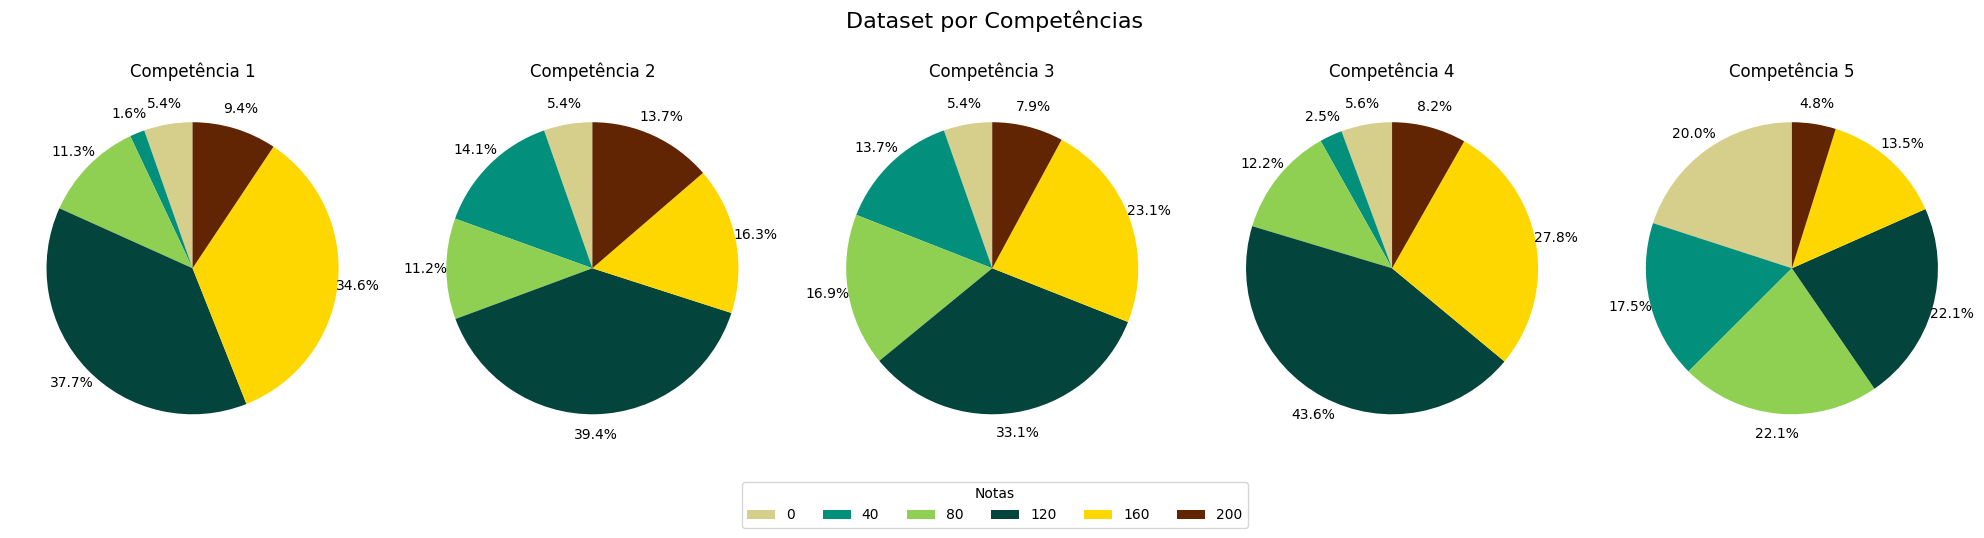

In [20]:
# Count occurrences of each value for every competence column
competence_values = [0, 40, 80, 120, 160, 200]
competencies_labels = ['Competência 1', 'Competência 2', 'Competência 3', 'Competência 4', 'Competência 5']
counts = {col: df[col].value_counts().reindex(competence_values, fill_value=0) for col in competencies_labels}
counts_df = pd.DataFrame(counts)
colors = ["#d6ce8bff", "#02907dff", "#8fd053ff", "#03453dff", "#ffd700ff", "#622504ff"]


# Plotting pie charts with percentage labels positioned outside
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, (col, label) in enumerate(zip(counts_df.columns, competencies_labels)):
    ax = axes[i]
    data = counts_df[col]
    wedges, texts, autotexts = ax.pie(
        data,
        colors=colors,  # Apply custom colors
        autopct=lambda pct: f'{pct:.1f}%' if pct > 0 else '',
        startangle=90,
        textprops={'ha': 'center'},
    )
    # Move the percentage labels outside the pie chart more prominently
    for autotext in autotexts:
        x, y = autotext.get_position()
        autotext.set_position((1.9 * x, 1.9 * y))  # Increase scaling factor for positioning further out
    ax.set_title(label)

# Add a main title
fig.suptitle("Dataset por Competências", fontsize=16)

# Add a single legend for all pie charts, positioned below the title
fig.legend(wedges, competence_values, title="Notas", loc="upper center", bbox_to_anchor=(0.5, 0.05), ncol=6)

plt.tight_layout()
plt.show()

In [21]:
general_df = []
for dataset_type in dataset_types:
    dataset_filepath = path_to + dataset_name + "/" + dataset_type + ".csv"
    df = pd.read_csv(dataset_filepath)
    df['grades'] = df['grades'].apply(lambda label: list(map(int, label.strip("[]").replace(",", " ").split()[:5])))
    grades_expanded = pd.DataFrame(df['grades'].tolist(), columns=['Competência 1', 'Competência 2', 'Competência 3', 'Competência 4', 'Competência 5'], index=df.index)
    df = pd.concat([df, grades_expanded], axis=1)
    general_df.append(df)
    print(f"{dataset_type}: {df.shape[0]}")

df = pd.concat(general_df, axis=0)
print(f"Total: {df.shape[0]}")

train: 744
test: 216
validation: 195
Total: 1155


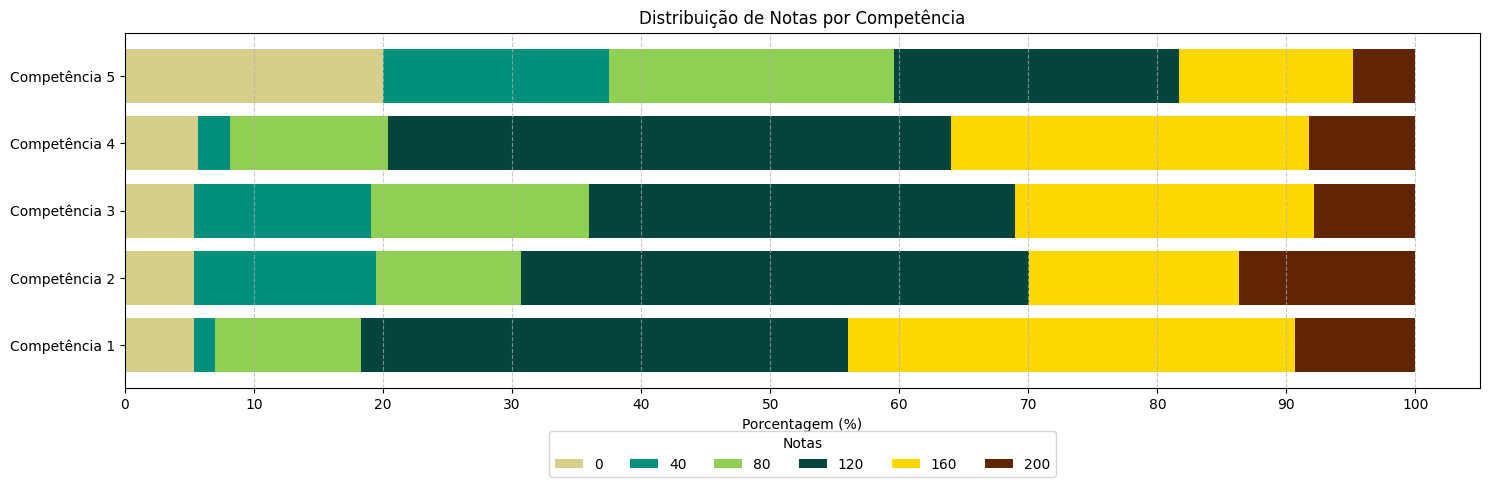

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming `df` is already defined and represents the dataset

# Count occurrences of each value for every competence column
competence_values = [0, 40, 80, 120, 160, 200]
competencies_labels = ['Competência 1', 'Competência 2', 'Competência 3', 'Competência 4', 'Competência 5']
counts = {col: df[col].value_counts().reindex(competence_values, fill_value=0) for col in competencies_labels}
counts_df = pd.DataFrame(counts)

# Rearrange the DataFrame to ensure correct order of competence values
normalized_counts = normalized_counts.loc[competence_values]

# Define custom colors for the bar segments
colors = ["#d6ce8bff", "#02907dff", "#8fd053ff", "#03453dff", "#ffd700ff", "#622504ff"]

# Plotting horizontal stacked bar chart with vertical gridlines for better visualization
fig, ax = plt.subplots(figsize=(15, 5))

# Loop through each competence and plot its normalized values as a stacked bar
for i, col in enumerate(normalized_counts.columns):
    bottom = 0  # Initialize the bottom for stacking
    for j, value in enumerate(competence_values):
        ax.barh(
            y=i,  # Position of the bar for the current competence
            width=normalized_counts[col].iloc[j],  # Percentage width of the segment
            left=bottom,  # Start position of the segment
            color=colors[j],  # Corresponding color
            label=value if i == 0 else None  # Add legend labels only for the first competence
        )
        bottom += normalized_counts[col].iloc[j]  # Update bottom for the next segment

# Add vertical gridlines for easier visualization of percentages
ax.set_xticks(range(0, 101, 10))  # Set ticks from 0 to 100 with steps of 10
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add labels and title
ax.set_yticks(range(len(competencies_labels)))
ax.set_yticklabels(competencies_labels)
ax.set_xlabel("Porcentagem (%)")
ax.set_title("Distribuição de Notas por Competência")

# Add a legend
ax.legend(title="Notas", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=6)

plt.tight_layout()
plt.show()

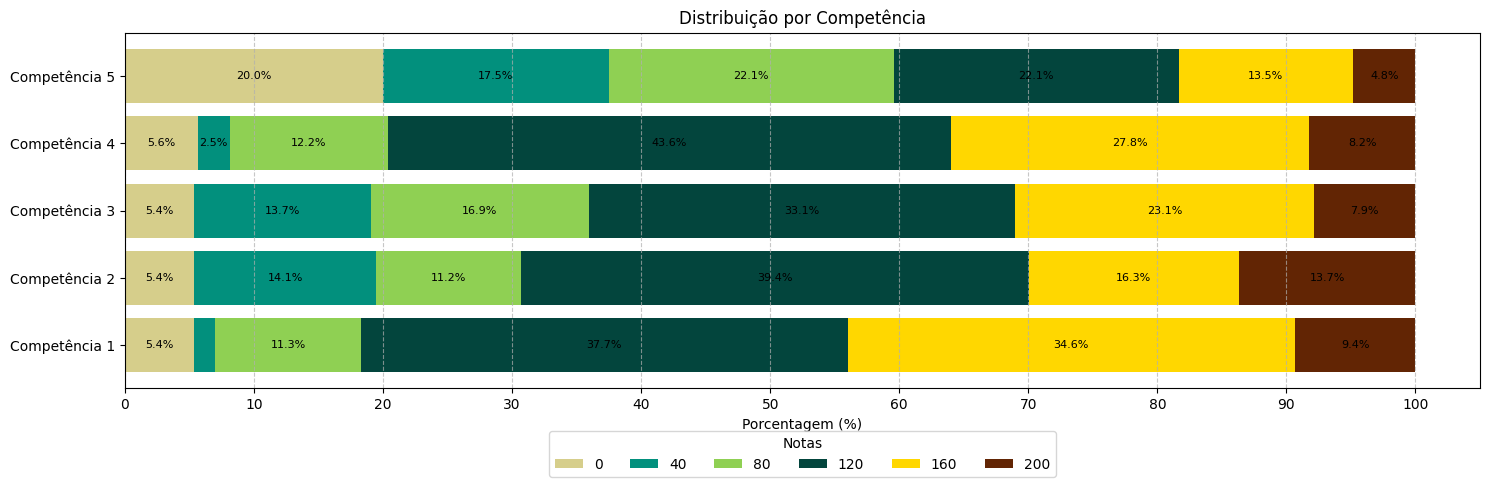

In [36]:
# Plotting horizontal stacked bar chart with percentage values inside each bar
fig, ax = plt.subplots(figsize=(15, 5))

# Loop through each competence and plot its normalized values as a stacked bar
for i, col in enumerate(normalized_counts.columns):
    bottom = 0  # Initialize the bottom for stacking
    for j, value in enumerate(competence_values):
        width = normalized_counts[col].iloc[j]
        # Plot each segment of the bar
        ax.barh(
            y=i,  # Position of the bar for the current competence
            width=width,  # Percentage width of the segment
            left=bottom,  # Start position of the segment
            color=colors[j],  # Corresponding color
            label=value if i == 0 else None  # Add legend labels only for the first competence
        )
        # Add the percentage text if the width is significant
        if width > 2:  # Avoid clutter for very small percentages
            ax.text(
                bottom + width / 2,  # Position at the center of the segment
                i,  # Vertical position at the bar's row
                f'{width:.1f}%',  # Format the percentage
                ha='center', va='center', fontsize=8, color='black'
            )
        bottom += width  # Update bottom for the next segment

# Add vertical gridlines for easier visualization of percentages
ax.set_xticks(range(0, 101, 10))  # Set ticks from 0 to 100 with steps of 10
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add labels and title
ax.set_yticks(range(len(competencies_labels)))
ax.set_yticklabels(competencies_labels)
ax.set_xlabel("Porcentagem (%)")
ax.set_title("Distribuição por Competência")

# Add a legend
ax.legend(title="Notas", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=6)

plt.tight_layout()
plt.show()

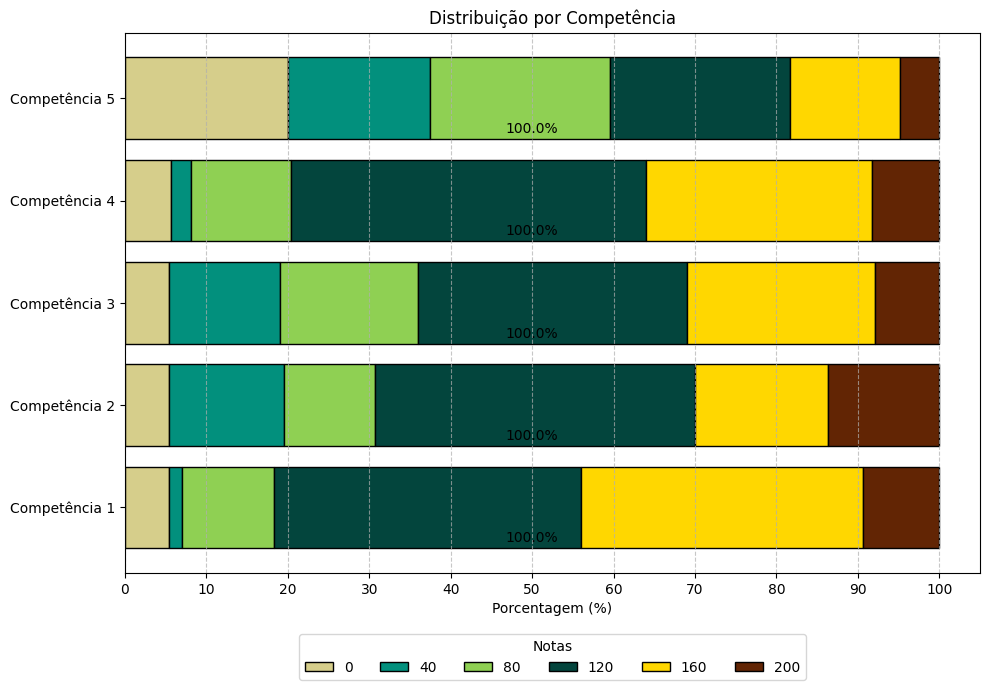

In [37]:
# Plotting horizontal stacked bar chart with percentage values below each bar
fig, ax = plt.subplots(figsize=(10, 7))

# Loop through each competence and plot its normalized values as a stacked bar
for i, col in enumerate(normalized_counts.columns):
    bottom = 0  # Initialize the bottom for stacking
    total_width = 0  # To calculate the total percentage for positioning the label
    for j, value in enumerate(competence_values):
        width = normalized_counts[col].iloc[j]
        # Plot each segment of the bar
        ax.barh(
            y=i,  # Position of the bar for the current competence
            width=width,  # Percentage width of the segment
            left=bottom,  # Start position of the segment
            color=colors[j],  # Corresponding color
            edgecolor='black',
            label=value if i == 0 else None  # Add legend labels only for the first competence
        )
        bottom += width  # Update bottom for the next segment
        total_width += width  # Increment the total width

    # Add the percentage text below the entire bar, centered
    ax.text(
        total_width / 2,  # Horizontal position at the middle of the entire bar
        i - 0.3,  # Position below the bar
        f'{total_width:.1f}%',  # Format the percentage
        ha='center', va='center', fontsize=10, color='black'
    )

# Add vertical gridlines for easier visualization of percentages
ax.set_xticks(range(0, 101, 10))  # Set ticks from 0 to 100 with steps of 10
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add labels and title
ax.set_yticks(range(len(competencies_labels)))
ax.set_yticklabels(competencies_labels)
ax.set_xlabel("Porcentagem (%)")
ax.set_title("Distribuição por Competência")

# Add a legend
ax.legend(title="Notas", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=6)

plt.tight_layout()
plt.show()

In [38]:
# Normalize counts to percentages
normalized_counts = counts_df.div(counts_df.sum(axis=0), axis=1) * 100

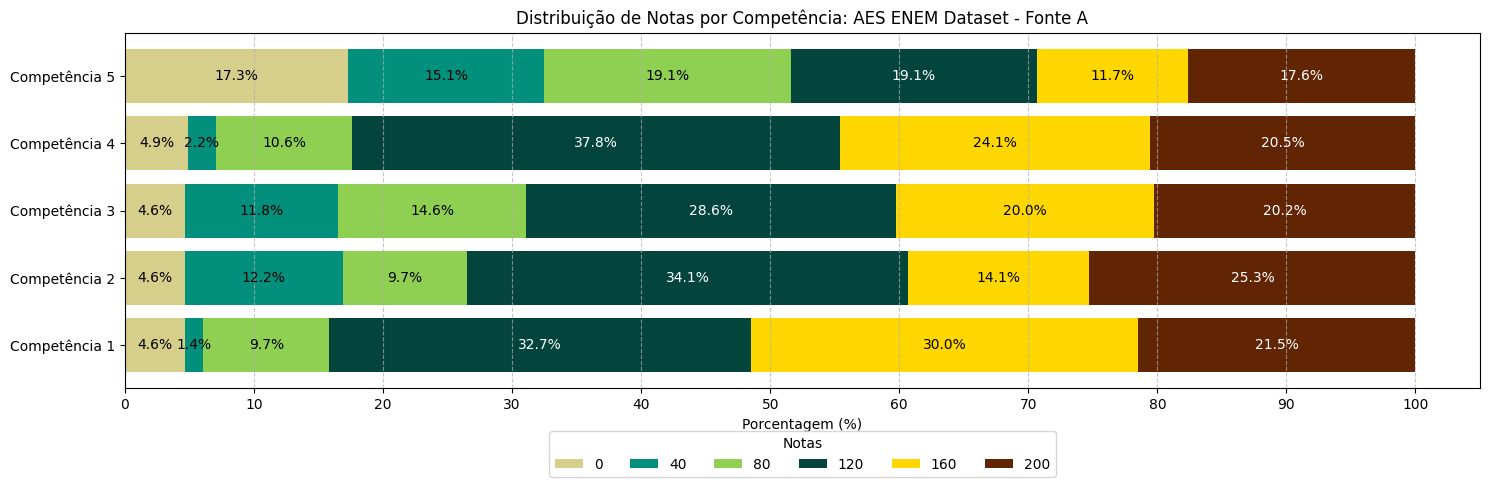

In [39]:
# Plotting horizontal stacked bar chart with adjusted text colors for dark segments
fig, ax = plt.subplots(figsize=(15, 5))

# Loop through each competence and plot its normalized values as a stacked bar
for i, col in enumerate(normalized_counts.columns):
    bottom = 0  # Initialize the bottom for stacking
    for j, value in enumerate(competence_values):
        width = normalized_counts[col].iloc[j]
        # Plot each segment of the bar
        ax.barh(
            y=i,  # Position of the bar for the current competence
            width=width,  # Percentage width of the segment
            left=bottom,  # Start position of the segment
            color=colors[j],  # Corresponding color
            label=value if i == 0 else None  # Add legend labels only for the first competence
        )
        # Add the percentage text if the width is significant
        #if width > 2:  # Avoid clutter for very small percentages
        text_color = 'white' if value in [120, 200] else 'black'  # Adjust text color for darker segments
        ax.text(
            bottom + width / 2,  # Position at the center of the segment
            i,  # Vertical position at the bar's row
            f'{width:.1f}%',  # Format the percentage
            ha='center', va='center', fontsize=10, color=text_color
        )
        bottom += width  # Update bottom for the next segment

# Add vertical gridlines for easier visualization of percentages
ax.set_xticks(range(0, 101, 10))  # Set ticks from 0 to 100 with steps of 10
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add labels and title
ax.set_yticks(range(len(competencies_labels)))
ax.set_yticklabels(competencies_labels)
ax.set_xlabel("Porcentagem (%)")
ax.set_title("Distribuição de Notas por Competência: AES ENEM Dataset - Fonte A + Redações  )

# Add a legend
ax.legend(title="Notas", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=6)

plt.tight_layout()
plt.show()

In [40]:
fig.savefig("./figures/dataset_aes_enem_radacao_mil.png", dpi=300, bbox_inches="tight")